In [1]:
import sys
sys.path.insert(0,'/home/jujuman/Gits/ase')

from ase_interface import ANIENS
from ase_interface import ensemblemolecule

import pyNeuroChem as pync
import pyaniasetools as pya
import hdnntools as hdt

import numpy as np
import  ase
import time
#from ase.build import molecule
#from ase.neb import NEB
#from ase.calculators.mopac import MOPAC
from ase.md.langevin import Langevin
from ase.io.trajectory import Trajectory
from ase import units
from ase import Atoms

from ase.md.velocitydistribution import MaxwellBoltzmannDistribution

from ase.optimize.fire import FIRE as QuasiNewton

from ase.md.nvtberendsen import NVTBerendsen
from ase.md import MDLogger

#from ase.neb import NEBtools
from ase.io import read, write
from ase.optimize import BFGS, LBFGS, MDMin, GradientDescent

import math

np.set_printoptions(precision=3)

In [2]:
#----------------Parameters--------------------

dir = '/home/jujuman/Research/hard_const_test/'

# Molecule file
molfile = dir + 'butaneoh.xyz'

# Optimized structure out:
intfile = dir + 'butaneoh_int.xyz'
optfile = dir + 'butaneoh_opt.xyz'

C = 0.001 # Optimization convergence

wkdir = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
cnstfile = wkdir + 'rHCNO-4.6A_16-3.1A_a4-8.params'
saefile  = wkdir + 'sae_6-31gd.dat'
nnfdir   = wkdir + '/train'
Nn = 5
#nnfdir   = wkdir + 'networks/'
#----------------------------------------------

In [3]:
# Load molecule
mol = read(molfile)
#print('test')
#L = 90.0
#mol.set_cell(([[L, 0, 0],
#               [0, L, 0],
#               [0, 0, L]]))

#mol.set_pbc((True, True, True))

print(mol.get_chemical_symbols())

# Set NC
aens = ensemblemolecule(cnstfile, saefile, nnfdir, Nn, 1)

# Set ANI calculator
mol.set_calculator(ANIENS(aens,sdmx=20000000.0))

['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'O', 'H', 'H', 'H', 'H', 'H', 'H']


In [4]:
mol.get_potential_energy()

-6352.6628316252882

In [5]:
F = mol.get_forces()
print(F)

[[ -2.043e-01  -2.364e+00  -5.808e-02]
 [  1.446e-01  -1.297e-02   2.432e-02]
 [ -1.055e+01  -1.494e+01  -5.886e-01]
 [  2.678e-02   2.943e-02   4.033e-03]
 [ -2.281e-01  -2.081e-01   2.640e-01]
 [ -2.254e-01   1.482e-01  -1.894e-01]
 [ -2.105e-02   1.925e-02  -1.257e-02]
 [ -2.020e-02   3.962e-02   1.070e-02]
 [  1.627e+01   2.383e+01   2.816e+00]
 [ -2.869e-02  -5.640e-03   8.067e-05]
 [ -2.803e+00  -2.982e+00  -1.512e+00]
 [ -2.684e+00  -2.565e+00   1.096e+00]
 [  5.689e-03  -2.369e-02  -3.181e-02]
 [  5.568e-03  -1.068e-02   2.924e-02]
 [  3.143e-01  -9.515e-01  -1.851e+00]]


In [6]:
#Butane
#dhl = [3, 1, 0, 2]
#dhl1 = [3, 6, 7, 9, 12, 13]
#dhl2 = [2, 4, 5, 8, 10, 11]

##Butane OH
dhl = [3, 1, 0, 2]
dhl1 = [3, 6, 7, 9, 12, 13]
dhl2 = [2, 4, 5, 8, 10, 11, 14]

##Butane 2OH
#dhl = [3, 1, 0, 2]
#dhl1 = [3, 6, 7, 12, 13, 14, 15]
#dhl2 = [2, 4, 5, 8, 9, 10, 11]

#Butane OH ene
#dhl = [3, 1, 0, 2]
#dhl1 = [3, 7, 10, 11, 13, 14, 15]
#dhl2 = [2, 4, 5, 6, 8, 9, 12]

#Butane OH 2ene
#dhl = [3, 1, 0, 2]
#dhl1 = [3, 5, 8, 9, 11, 12, 13]
#dhl2 = [2, 4, 6, 7, 10, 14, 15, 16]

#but2Neneoh
#dhl = [3, 1, 0, 2]
#dhl1 = [3, 5, 8, 9, 11, 15, 16, 17]
#dhl2 = [2, 4, 6, 7, 10, 12, 13, 14]

#Ethene
#dhl = [3, 0, 1, 5]
#dhl1 = [2, 3]
#dhl2 = [4, 5]

# Phi diala
#dhl = [2, 5, 6, 7]
#dhl1 = [0, 1, 2, 3, 4, 11, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26 ]
#dhl2 = [7, 8, 9, 10, 18, 19, 20, 21, 27, 28, 29, 30, 31]

# Psi diala
#dhl = [5, 6, 7, 10]
#dhl1 = [0, 1, 2, 3, 4, 5, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26 ]
#dhl2 = [8, 10, 27, 28, 29, 30, 31]
math.degrees(mol.get_dihedral(dhl))

180.0

In [7]:
# Save optimized mol
spc = mol.get_chemical_symbols()
pos = mol.get_positions(wrap=True).reshape(1,len(spc),3)

hdt.writexyzfile(intfile, pos, spc)

In [8]:
dyn = QuasiNewton(mol, logfile='/home/jujuman/Research/hard_const_test/log.out')
dyn.run(fmax=C, steps=5000)
# Save optimized mol
spc = mol.get_chemical_symbols()
pos = mol.get_positions()

print('Initial:','{:.2f}'.format(math.degrees(mol.get_dihedral(dhl))))

#dhls = []
#for i in dhl1:
#    for j in dhl2:
#        dhls.append([i,dhl[1],dhl[2],j])
dhls = [dhl]

ai = []
for atom in dhl2:
    dhlt = dhl[0:3]
    dhlt.append(atom)
    a = math.degrees(mol.get_dihedral(dhlt))
    ai.append(a)
        
# Optimize molecule
X = [pos]
A = []
E = []
Sig = []
for i in range(0,76):
    molc = Atoms(symbols=spc, positions=pos)
    molc.set_calculator(ANIENS(aens,sdmx=20000000.0))
    molc.calc.set_hard_tortional_restraint(tres=dhls)
    da = 5.0
    for atom,angle in zip(dhl2,ai):
        dhlt = dhl[0:3]
        dhlt.append(atom)
        a = math.degrees(molc.get_dihedral(dhlt))
        molc.set_dihedral(dhlt, angle=math.radians(angle+i*da))
    an = molc.get_dihedral(dhl)
    #pos = mol.get_positions()
    #X.append(pos)
    
    dyn = QuasiNewton(molc, logfile='/home/jujuman/Research/hard_const_test/log.out')
    for j in range(1):
        #for atom,angle in zip(dhl2,ai):
        #    dhlt = dhl[0:3]
        #    dhlt.append(atom)
        #    a = math.degrees(molc.get_dihedral(dhlt))
        #    molc.set_dihedral(dhlt, angle=math.radians(angle+i*da))
        #for angle in aset:
        #    molc.set_dihedral(dhlt, angle=math.radians(angle))
        molc.calc.calculate(molc)
        energy = hdt.evtokcal*molc.get_potential_energy()
        forces = hdt.evtokcal*molc.get_forces()
        #print(forces)
        Sig.append(hdt.evtokcal*molc.calc.stddev)
        
        dyn.run(fmax=C, steps=1500)
        #print('[ANI Total time:', time.time() - start_time, 'seconds]')
    
    print(i,'Steps:',dyn.nsteps,'Angle:', '{:.2f}'.format(math.degrees(an)), '{:.2f}'.format(math.degrees(molc.get_dihedral(dhl))), '{:.2f}'.format(hdt.evtokcal*molc.calc.stddev),'Energy:''{:.2f}'.format(energy), 'Forces:','{:.2f}'.format(np.mean(np.abs(forces.flatten()))))

    E.append(hdt.evtokcal*molc.get_potential_energy())
    #print(hdt.evtokcal*np.mean(np.abs(mol.get_forces())))
    A.append(math.degrees(molc.get_dihedral(dhl)))
    
    # Save optimized mol
    spc = molc.get_chemical_symbols()
    pos2 = molc.get_positions()
    X.append(pos2)

hdt.writexyzfile(optfile, np.stack(X), spc)

Initial: 180.14
0 Steps: 0 Angle: 180.14 180.14 0.06 Energy:-172971.05 Forces: 0.01
1 Steps: 44 Angle: 185.14 185.39 0.05 Energy:-172970.96 Forces: 0.14
2 Steps: 93 Angle: 190.14 190.53 0.05 Energy:-172970.70 Forces: 0.28
3 Steps: 141 Angle: 195.14 195.67 0.05 Energy:-172970.31 Forces: 0.44
4 Steps: 148 Angle: 200.14 200.89 0.05 Energy:-172969.82 Forces: 0.60
5 Steps: 132 Angle: 205.14 206.22 0.05 Energy:-172969.26 Forces: 0.75
6 Steps: 102 Angle: 210.14 211.58 0.05 Energy:-172968.67 Forces: 0.91
7 Steps: 84 Angle: 215.14 216.78 0.05 Energy:-172968.10 Forces: 1.03
8 Steps: 104 Angle: 220.14 221.82 0.06 Energy:-172967.59 Forces: 1.12
9 Steps: 125 Angle: 225.14 226.90 0.08 Energy:-172967.18 Forces: 1.18
10 Steps: 171 Angle: 230.14 231.90 0.09 Energy:-172966.90 Forces: 1.21
11 Steps: 191 Angle: 235.14 236.18 0.10 Energy:-172966.76 Forces: 1.18
12 Steps: 166 Angle: 240.14 241.13 0.11 Energy:-172966.73 Forces: 1.17
13 Steps: 150 Angle: 245.14 246.38 0.11 Energy:-172966.82 Forces: 1.15
14 St

In [9]:
math.degrees(mol.get_dihedral(dhl))

180.1400450298822

In [10]:
import matplotlib.pyplot as plt

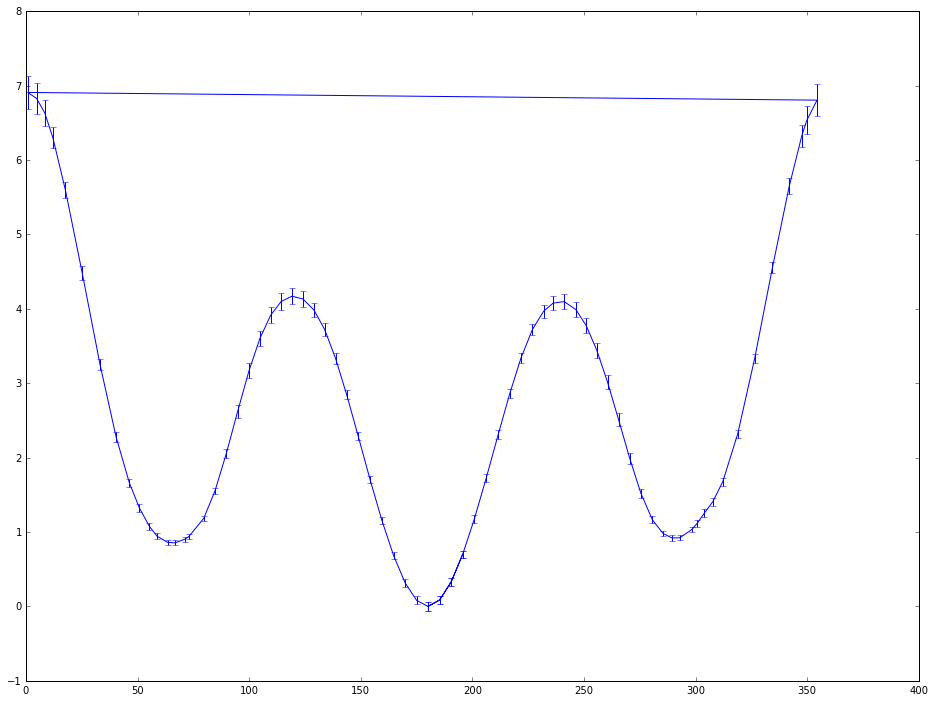

In [11]:
fig = plt.figure(figsize=[16,12])
E = np.array(E)
A = np.array(A)
Sig = np.array(Sig)
plt.errorbar(A,E-E.min(),yerr = Sig)
plt.show()

#### 